In [ ]:
#Aim 1 and Aim 2 results
#authentication
import masterClass
#masterClass.classifyCV()
#masterClass.classifyDS()
#masterClass.classifySS()
#masterClass.classifyBS()
#Classify All tasks with rest split 
masterClass.classifyAll()



In [ ]:
#Classify All using a PCA approach
#Need to vet this process to ensure it is correct
import masterClass
import pandas as pd
import numpy as np
pca50=pd.DataFrame()
#50% variance explained
#numComponents=[.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9]
num=1
while num<40:
#for num in numComponents:
    tmp=masterClass.classifyAll_wPCA(num,.5)
    tmp['numComponent']=num
    pca50=pd.concat([pca50,tmp])
    num=num+1
    print('now at ', num)
pca50.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/pca50_acc.csv',index=False)

In [ ]:
#Feature Selection of networks
import featSelection
import sys
import os
import pandas as pd
import numpy as np
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/results/'
subDir=outDir+'subNetwork/'
allDF=pd.DataFrame()
CVDF=pd.DataFrame()
SSDF=pd.DataFrame()
DSDF=pd.DataFrame()
BSDF=pd.DataFrame()
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 494),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
for network in netRoi:
    print('Now running for network '+network)
    #tmpCV=featSelection.classifyCV(network)
    #tmpCV['network']=network
    #tmpCV['feature']=netRoi[network]
    #CVDF=pd.concat([CVDF,tmpCV])
    #tmpDS=featSelection.classifyDS(network)
    #tmpDS['network']=network
    #tmpDS['feature']=netRoi[network]
    #DSDF=pd.concat([DSDF,tmpDS])
    #tmpSS=featSelection.classifySS(network)
    #tmpSS['network']=network
    #tmpSS['feature']=netRoi[network]
    #SSDF=pd.concat([SSDF,tmpSS])
    #tmpBS=featSelection.classifyBS(network)
    #tmpBS['network']=network
    #tmpBS['feature']=netRoi[network]
    #BSDF=pd.concat([BSDF,tmpBS])
    tmp=featSelection.classifyAll(network)
    tmp['network']=network
    tmp['feature']=netRoi[network]
    allDF=pd.concat([allDF,tmp])
#DSDF.to_csv(subDir+'DS/acc.csv',index=False)
#SSDF.to_csv(subDir+'SS/acc.csv',index=False)
#BSDF.to_csv(subDir+'BS/acc.csv',index=False)
#CVDF.to_csv(subDir+'CV/acc.csv',index=False)
allDF.to_csv(subDir+'ALL/acc.csv',index=False)

In [ ]:
#Permutation
#SSmOS_CVmDS
import SSmOS
import pandas as pd
CVmDS_df=pd.DataFrame()
for i in range(1000):
    DS=SSmOS.CVmDS()
    CVmDS_df=pd.concat([CVmDS_df,DS])
CVmDS_df.to_csv('~/Desktop/MSC_Alexis/analysis/output/results/permutation/CVmDS_acc.csv',index=False)


In [ ]:
#Permutation
#SSmOS_SSmBS
import SSmOS
import pandas as pd
SSmBS_df=pd.DataFrame()
for i in range(1000):
    SS=SSmOS.SSmBS()
    SSmBS_df=pd.concat([SSmBS_df, SS])
SSmBS_df.to_csv('~/Desktop/MSC_Alexis/analysis/output/results/permutation/SSmBS_acc.csv',index=False)


In [ ]:
#Permutation different task compared to same task
#STmDT_CVmSS
import DTmST
#DTmST.DSmBS()
DTmST.CVmSS()

In [ ]:
#Permutation different sub compared to same sub using all data for training
import SSmOS
#All tasks
SSmOS.classifyScores()

In [ ]:
#permutation testing on each analysis CV SS DS BS and ALL separately 1000 times
import permutation
permutation.permuteProcess()

In [ ]:
#Manipulating Frames
import manFrames
manFrames.storeResults()

In [ ]:
#Manipulating Days 
import manDays
manDays.runDays()

In [ ]:
#Group avg classification Train 7 subs test 1 sub same task v new task
import groupAvg
#splits up training tasks and testing tasks. Bins all sessions together
groupAvg.groupApp()
#seperates training and testing via sessions. Leave one sub out cv per session
groupAvg.allTask()


In [1]:
import reshape
import os
import sys
taskList=['glass','semantic', 'motor','mem','rest']

thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
#Only using subs with full 10 sessions
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subList:
    for task in taskList:
        tmp=reshape.matFiles(dataDir+task+'/'+sub+'_parcel_corrmat.mat')
        print(tmp.shape, ' number of sessions for ', sub, ' in task ', task)

(10, 55278)  number of sessions for  MSC01  in task  glass
(10, 55278)  number of sessions for  MSC01  in task  semantic
(10, 55278)  number of sessions for  MSC01  in task  motor
(10, 55278)  number of sessions for  MSC01  in task  mem
(10, 55278)  number of sessions for  MSC01  in task  rest
(10, 55278)  number of sessions for  MSC02  in task  glass
(10, 55278)  number of sessions for  MSC02  in task  semantic
(10, 55278)  number of sessions for  MSC02  in task  motor
(10, 55278)  number of sessions for  MSC02  in task  mem
(10, 55278)  number of sessions for  MSC02  in task  rest
(10, 55278)  number of sessions for  MSC03  in task  glass
(10, 55278)  number of sessions for  MSC03  in task  semantic
(10, 55278)  number of sessions for  MSC03  in task  motor
(8, 55278)  number of sessions for  MSC03  in task  mem
(10, 55278)  number of sessions for  MSC03  in task  rest
(10, 55278)  number of sessions for  MSC04  in task  glass
(10, 55278)  number of sessions for  MSC04  in task  sema

In [1]:
#Some Block analysis
#CO-CO, CO-FP, CO-DMN
#network=['co','fp','default']
import block_featSelection
#block_featSelection.Net2Net()
#block_featSelection.subNetAll()



#block_featSelection.CVNet2Net()
block_featSelection.DSNet2Net()


unassign
default
visual
fp
dan
van
salience
co
sm
sm-lat
auditory
pmn
pon


In [ ]:
import wtn_btw_netSelection

wtn_btw_netSelection.classifyWTN()

wtn_btw_netSelection.classifyBTW()

In [ ]:
import permuteROI
permuteROI.classifyAll()
    


In [ ]:
#Random feature selection 
import numpy as np
import featSelect_speed
featSelect_speed.runScript()


In [ ]:
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
import permuteROI
for sub in subList:
    res=permuteROI.NULLmodelAll_byRow(sub)
    res.tofile('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/permutation/ALL/subs/'+sub+'_NULLRow.csv', sep = ',')

In [ ]:
import quest_all_rdmNetNull as q
q.runAll()


In [ ]:
import pandas as pd
import numpy as np
import featSelect_speed as fs
DS_df=pd.DataFrame()
import os
import sys
import reshape
from statistics import mean
#import other python scripts for further anlaysis
# Initialization of directory information:
#thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/results/rdmNetwork/'
#generate log sample
#1000 points for log selection
#loop through 125 times to generate 8*125=1000 samples per log point
featureSize=np.logspace(1, 4.7, num=39,dtype=int)
for i in range(100):
    for number in featureSize:
        #generate a new index
        idx=np.random.randint(55278, size=(number))
        DS=fs.DSmodel(idx)
        DS['feature']=number
        DS_df=pd.concat([DS_df,DS])
    print('Finished with '+str(i)+' in iteration 100')
DS_df.to_csv(outDir+'DS/acc.csv', index=False)

In [ ]:
import DTmST
DTmST.multiclass_perm()

In [ ]:
import DTmST
dfSS=DTmST.classifySS()
dfSS.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/permutation/TrueDiff_TaskOnly_STmDT_CVmSS_acc.csv',index=False)

In [1]:
import manDays
manDays.classifyAll()


Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished with subject
Finished w

In [2]:
import DTmST
DTmST.multiclass_perm()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1]:
import quest_network_script as q
from sklearn.linear_model import RidgeClassifier
q.classifyIndNet()

In [1]:
clf=RidgeClassifier()
#train sub
taskFC, restFC=q.netFile('IndNet','MSC01')
#test sub
test_taskFC, test_restFC=q.netFile('IndNet','MSC02')
tn,fp,fn,tp=q.K_folds(clf, taskFC, restFC, test_taskFC, test_restFC)

In [1]:
import IndNet as IN
IN.permutation()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

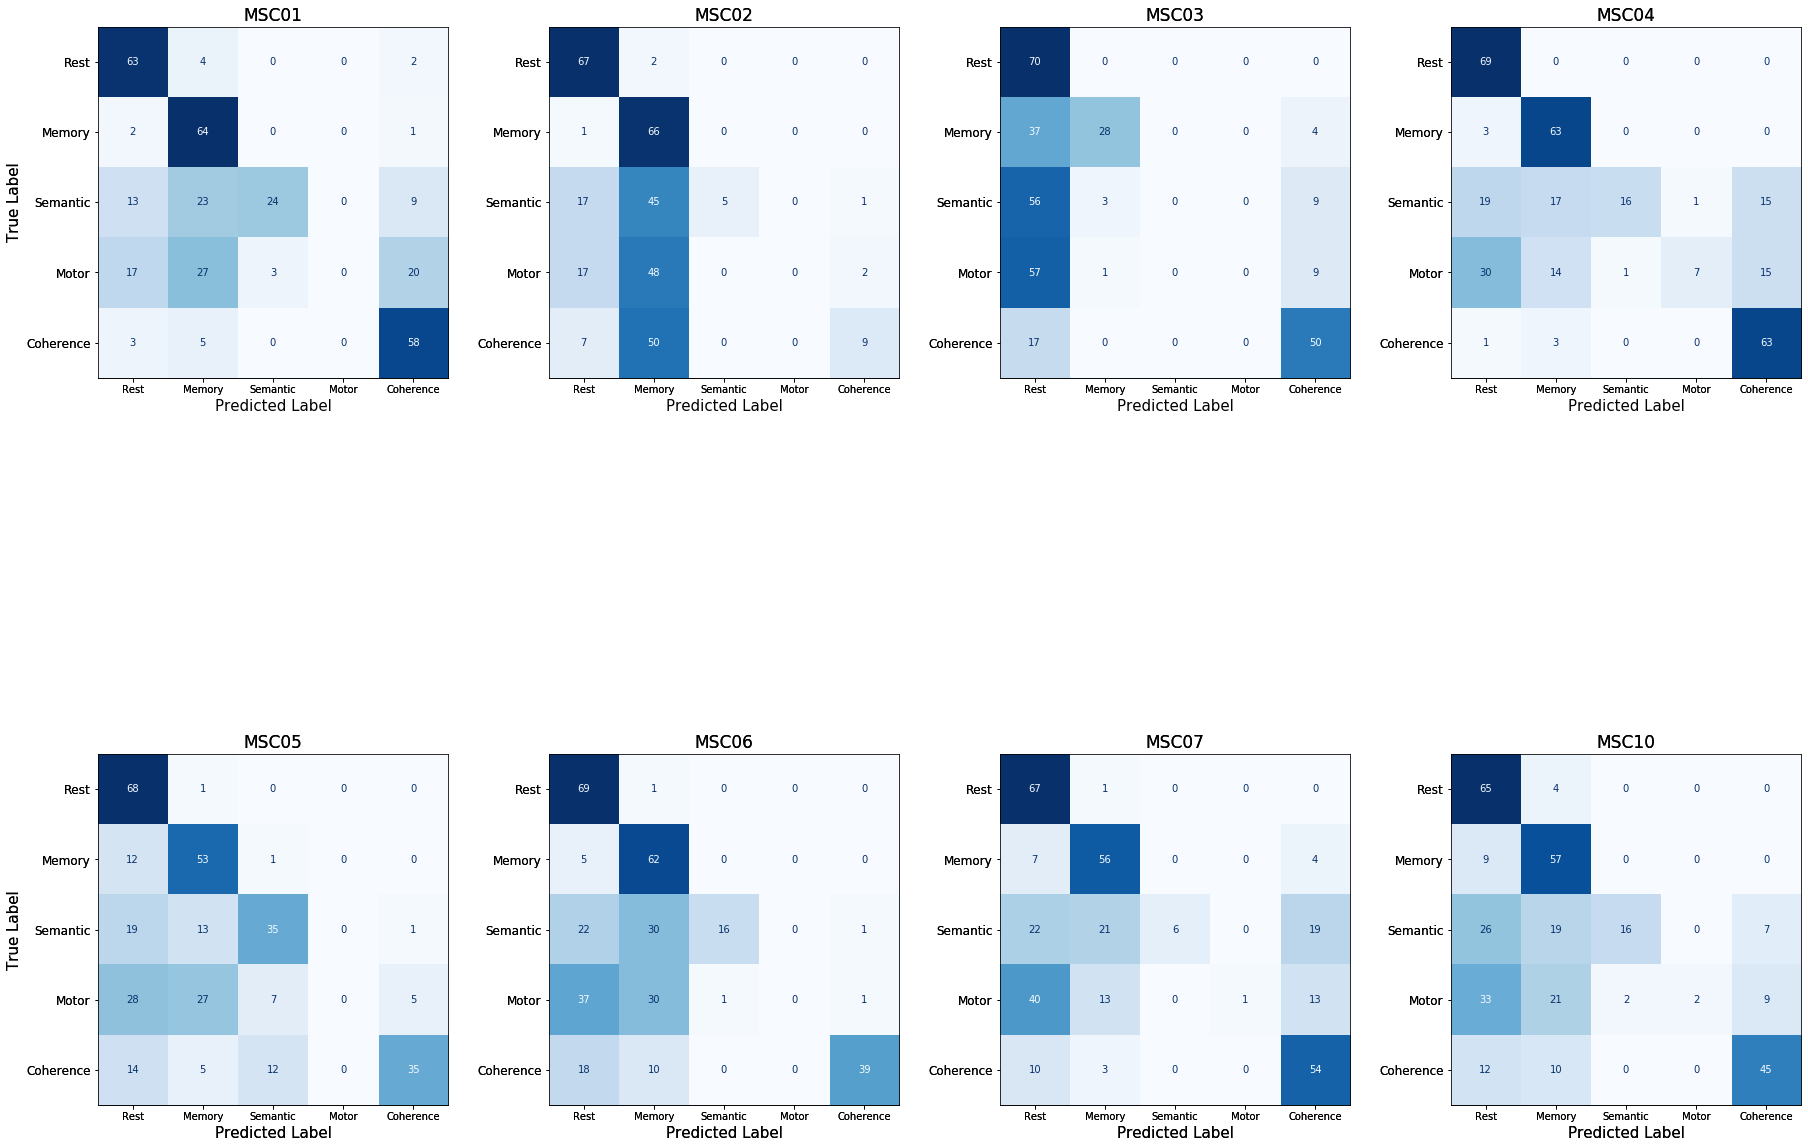

In [1]:
import seperate_task as st
st.multiclassAll()


In [9]:
import reshape
reshape.determineNetSize('salience','salience')

6